### BAIT 508 HW1: SEC Filings Analytics

# DUE DATE: Sunday, Oct 3rd, 2021 11:59 p.m.!


- Before taking this assignment, please take a look at the instruction carefully.
- In this assignment, you will use your Python skills (`pandas`, `matplotlib`, `for` loop, `if` condition, ...) to analyze SEC filings.
- There are short-answer questions and visualization questions. 
- 20 problems, 5 points each, total 100 points
- For visualization questions, save them separately using the specified file name: `hw1_ans{question_number}_{student_id}.png` <br/>
(e.g.) <b>hw1_ans13_37510930.png</b>
- Please <b>don’t</b> submit the `png` file in Canvas. We will run your code to generate this `png` file!
- Submit your Python code in UBC Canvas. DO NOT email your homework to instructors. 
- In UBC Canvas, please submit your Python code with the file name `hw1_{studentid}.py` (e.g.<b>hwl_37510930.py</b>). Do not zip it!
- If you do not keep the standard submission format, there will be an <b>extra deduction</b> on your grade. 
- If code is not running, you will get <b>minimum</b> grade (Please run `hw1_{studentid}.py` codes by yourself before submitting the assignment).
- Late submissions will not be accepted!

### Import the appropriate library you need to solve the questions.

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random

### Please assign the variables `first_name`, `last_name`, `student_id`, and `email` with your first name, last name, student ID, and email address.

In [2]:
# Please assign the variables first_name, last_name, student_id, and email with your first name, last name, student ID, and email address.# 
first_name = str("Carlos Alexandre")
last_name = str("Nako")
student_id = int("45160975")
email = str("cnako@student.ubc.ca")
print("BAIT 508 Assignment 1")
print(first_name+" "+last_name)
print("student id: "+str(student_id))
print(email)

BAIT 508 Assignment 1
Carlos Alexandre Nako
student id: 45160975
cnako@student.ubc.ca


##### Question 1: Find the number of characters in this file and assign it to the `ans1` variable.
- Download `feed_header_2017-2019.tsv` file into the same directory, where `hw1_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- Open `feed_header_2017-2019.tsv` file with `read-only` file mode.
- Please use `open` function to open this `TSV` file.
- `TSV` file is similar to `CSV`, but its value is separated by `Tab`.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp

In [2]:

# Question 1

# Opening file
# based on code from class 07 'import1_ch1_import flatfile' slide 5
file = open('feed_header_2017-2019.tsv', mode='r')
feed = file.read()
file.close()

# Finding the length (number of characters) of a string
# based on code from class 02 'intro_ch3_functions_methods_packages' slide 12 & exercise 2 'String Methods'
ans1 = len(feed)

# printing answer
print('')
print('Question 1 answer:')
print(ans1)


Question 1 answer:
316388911


##### Question 2: Find the number of words in the file and assign it to the `ans2` variable.
- We consider <b>word</b> as all numbers, special characters, and text separated by white space.

[Hint]
- `split` option : https://www.w3schools.com/python/ref_string_split.asp

In [4]:

# Question 2

# Splitting the string into words
# based on code from https://www.w3schools.com/python/ref_string_split.asp
word = feed.split()

# Counting the number of words
# based on code from class 02 'intro_ch3_functions_methods_packages' slide 12 & exercise 3 'List methods and functions'
ans2 = len(word)

# Printing answer
print('')
print('Question 2 answer:')
print(ans2)


Question 2 answer:
26223290


##### Question 3: Find the number of lines in the file and assign it to the `ans3` variable.

In [5]:
# Question 3

# Counting the number of lines
# based on code from class 07 'import1_ch1_import flatfile'
ans3 = len(feed.split('\n'))

# printing answer
print('')
print('Question 3 answer:')
print(ans3)


Question 3 answer:
1765126


### From now on, you will decide which industry area you will analyze to investigate the trend of that industry. 
### To do so, you will select the first digit of `SIC` code.

##### Question 4: Divide the `student_id` by 7, and add 1 to the `remainder`. <br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Use `int` function to drop the decimal point. Assign its value to the `ans4` variable.

In [5]:

# Question 4

# Calculating residual from student_id/7 and adding 1
ans4 = int(student_id%7 + 1)

# printing answer
print('')
print('Question 4 answer:')
print(ans4)


Question 4 answer:
7


### Now, you have the first digit of `SIC` that you will analyze.
### Please extract the rows of the following condition. 
- Read the `tsv` using `pandas` function. 
- Save the dataframe name as `df`.
- You can extract this condition using various methods such as  `for-loop`, `pandas`, and `numpy`.


##### Question 5: Find the shape of `df` and assign it to the `ans5` variable.
- You need to read the file using pandas first and save it as `df`.
- Next, filter the row based on your `ans4` value and save this filtered dataframe as `df`.
- When you do sorting, please make `ASSIGNED-SIC` as `float` first.
- We need rows with an `ASSIGNED-SIC` column value ranging in `[ans4*1000,(ans4+1)*1000)`.
- Next, please sort the values that come in this range.
- Therefore, the filtered dataframe will be `df`!
- `ans5` value type should be `tuple`.

In [3]:

# Question 5

# Reading file as panda DataFrame
# based on code from class 07 'import1_ch1_import flatfile' exercise Pandas DataFrame!!
df = pd.read_csv('feed_header_2017-2019.tsv', sep='\t')

In [6]:

# Converting ASSIGNED-SIC to float
# based on code from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
df['ASSIGNED-SIC'].astype('float')

# Filtering ASSIGNED-SIC and sorting values
# based on code from class 06 'pandas part1 exploratory data analysis' exercise sort_values() and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
df = df[df['ASSIGNED-SIC']>=ans4*1000]
df = df[df['ASSIGNED-SIC']<=(ans4+1)*1000]
df = df.sort_values('ASSIGNED-SIC', ascending=False, ignore_index= True)

In [7]:

# Getting the shape of df
ans5 = df.shape

# printing answer
print('')
print('Question 5 answer:')
print(ans5)


Question 5 answer:
(144212, 12)


##### Question 6: Please find the third most appeared `FORM-TYPE` in dataframe `df` and assign its value to the `ans6`.
- You can find the form type information in the `FORM-TYPE` column.

[Hint]
- dictionary : https://www.w3schools.com/python/python_dictionaries.asp
- for-loop : https://www.w3schools.com/python/python_for_loops.asp

In [8]:

# Question 6

# Counting the FORM-TYPE and selecting the highest value
# based on code from class 06 'pandas part1 exploratory data analysis' exercise #3
ans6 = df['FORM-TYPE'].value_counts().index[2]

# printing answer
print('')
print('Question 6 answer:')
print(ans6)


Question 6 answer:
10-Q


##### Question 7: How many rows are there which `CITY` value is `SEATTLE` in dataframe `df`?
- You can find the city information in the `CITY` column.

[Hint]
- `count` method : https://www.w3schools.com/python/ref_list_count.asp
- convert dataframe into a list : https://datatofish.com/convert-pandas-dataframe-to-list/

In [9]:

# Question 7

# Filtering for SEATLE 
ans7 = df[df['CITY']=='SEATTLE'][['CITY']].count()[0]

In [10]:

# printing answer
print('')
print('Question 7 answer:')
print(ans7)


Question 7 answer:
1211


##### Question 8: How many cases are the same as the first 10 digits of `ACCESSION-NUMBER` and the `CIK` column value? <br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Please assign the total number of cases to the `ans8`.
- `ACCESSION-NUMBER` stands for the unique Document ID.
- Here is the example of `ACCESSION-NUMBER` : `0001193125-19-230866` 
- The first 10 digits (`0001193125`) comprise the Central Index Key (CIK) of the entity submitting the filing.
- This filing could be submitted by either the company or a third-party filer agent.
- If the company submit the file, then first 10 digits will be the same as its CIK value.
- For comparison, please convert both `CIK` value and first 10 digts of `ACESSION-NUMBER` as `integer`. 
- For example, we do not need first three zero in the case of `0001193125`. So the number should be `1193125`.

[Hint]
- `split` method : https://www.w3schools.com/python/ref_string_split.asp
- `numpy` : https://numpy.org/
- for-loop : https://www.w3schools.com/python/python_for_loops.asp

In [11]:

# Question 8

# Splitting the ACCESSION-NUMBER
# based on code from class 05 'inter_ch4_loop group exercises'
lst = []
for x in df['ACCESSION-NUMBER']:
    lst.append(x.split('-'))

# Adding first 10 digits of ACESSION-NUMBER as integer to df
# based on code from class 03 'inter_ch2_dictionaries_pandas'
accession = pd.DataFrame(lst)
df['first10digit'] = accession[0]
df['first10digit'] = df['first10digit'].astype('int64')
df['CIK'] = df['CIK'].astype('int64')

In [12]:

# Counting the cases where CIK and 10 digits of ACESSION-NUMBER are the same
# based on code from class 06 'pandas part1 exploratory data analysis'
ans8 = df[df['CIK']==df['first10digit']][['id']].count()[0]

In [13]:

# printing answer
print('')
print('Question 8 answer:')
print(ans8)


Question 8 answer:
30277


### From questions 9 to 12, you will analyze the feature of the company name.
### To solve questions 9~ 12, you need to use the `CONFORMED-NAME` column value from the dataframe `df`.

##### Question 9: Find the longest company name and assign it to the `ans9`.

- You do not need to split the value to extract the company name. 
- Here are company name examples : `Apple, inc.`, `Amazon, inc.`

In [14]:

# Question 9

# Checking for longest name
# based on code from class 05 'inter_ch4_loop group exercises'
ct = 0
nm = ''
for x in df['CONFORMED-NAME']:
    if len(x)>ct:
        ct = len(x)
        nm = x
ans9 = nm

In [15]:

# printing answer
print('')
print('Question 9 answer:')
print(ans9)


Question 9 answer:
Wellington Trust Company, National Association Multiple Common Trust Funds Trust, Micro Cap Equity P


##### Question 10: Find the most common `word` among company names and assign it to the `ans10`.

- We consider <b>word</b> as all numbers, special characters, and text separated by white space.
- You will get the <b>word</b> using the `split` method.
- For Question 10, each <b>word</b> is case-sensitive.
- Also, please do not remove the special characters and punctuation. (e.g., co., inc.)

[Hint]

- `split` method : https://www.w3schools.com/python/ref_string_split.asp

In [16]:

# Question 10

# Splitting companies names into words
# based on code from class 05 'inter_ch4_loop group exercises' and extend method from https://www.programiz.com/python-programming/methods/list/extend
lst2 = []
for x in df['CONFORMED-NAME']:
    lst2.extend(x.split())
name_words = pd.DataFrame(lst2)

# Counting words in all the names
# based on code from class 06 'pandas part1 exploratory data analysis'
ans10 = name_words[0].value_counts().index[0]

In [19]:

# printing answer
print('')
print('Question 10 answer:')
print(ans10)


Question 10 answer:
Inc.


### What was the answer to `ans10`? 
### Do you think the answer is informative?
### If not, the reason is that the value is not well preprocessed.
### For better interpretation, we need to take a preprocessing step.
### Data preprocessing can be defined as manipulating or extracting the data to enhance data analytic performance.
### Data preprocessing is an important step in the data mining process.

##### Question 11: Find the most common word among company names after `preprocessing` the data and assign it to the `ans11`.

[Please follow the below preprocessing step]
- Please lowercase the company name value. -> `Inc.` should be `inc.`
- Please remove all special characters and punctuation from a string. -> `inc.` should be `inc`
- To remove all special characters and punctuation, please use the following syntax : `'[^0-9a-zA-Z]+'`
- The value should consist of letters and numbers. -> `inc`
- Also, filter the value which length is less than 1. -> if there is a value `i`, then `i` should be removed

[Hint]
- Use regular expression : https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string

In [21]:

# Question 11

# based on code from https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python
df['preprocessing-NAME'] = df['CONFORMED-NAME'].str.lower()

# spliting words
# based on code from class 05 'inter_ch4_loop group exercises' and extend method from https://www.programiz.com/python-programming/methods/list/extend
lst3 = []
for x in df['preprocessing-NAME']:
    lst3.extend(x.split())


# removing all special characters and punctuation and removing 1 letter words
# based on code from class 05 'inter_ch4_loop group exercises' and https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string
lst4 = []
import re
for a in lst3:
    a1 = re.sub('[^0-9a-zA-Z]+', '', a)
    if len(a1)>1:
        lst4.append(a1)

name_words2 = pd.DataFrame(lst4)

# Counting words in all the names
# based on code from class 06 'pandas part1 exploratory data analysis'
ans11 = name_words2[0].value_counts().index[0]

In [21]:

# printing answer
print('')
print('Question 11 answer:')
print(ans11)


Question 11 answer:
inc


### Last step of  preprocessing the data is to get rid of the  `stopword`.
### `Stopwords` are generally the most common words in a language and may not be meaningful such as `the`, `a`, `of` and `or`.
### In the industry section, the following words can be stopwords (`inc`, `co`, `se`, `ltd`, ... ).
### Therefore, you need to delete the `stopwords` to get the most precise result.

##### Question 12: Find the most common word among company names after removing stopwords and assign it to the `ans12`.
- We consider <b>word</b> as all numbers and text separated by white space.
- Filter the word if the word includes any items among the provided `stopwords` list.
- `stopwords` list : `['inc','corp','co','ltd','de','llc','group','holdings','lp','plc','cf','sa','nv','gt','as','rr']`

In [22]:

# Question 12

# Defining stopwords
stopwords = ['inc','corp','co','ltd','de','llc','group','holdings','lp','plc','cf','sa','nv','gt','as','rr']

# Building on what was done on Question 11, the lst4 generated in that question is used to filter stopwords
# based on code from class 05 'inter_ch4_loop group exercises'
lst5 = []
for a in lst4:
    d=0
    for b in stopwords:
        if a == b:
            d = d + 1
    if d==0:
        if len(a)>1:
            lst5.append(a)


name_words3 = pd.DataFrame(lst5)

# Counting words in all the names
# based on code from class 06 'pandas part1 exploratory data analysis'
ans12 = name_words3[0].value_counts().index[0]

In [23]:

# printing answer
print('')
print('Question 12 answer:')
print(ans12)


Question 12 answer:
international


### Question 13 ~ 15: You want to see the trend of  `STATE` where the companies submit the `10-K` report in `2018` or `2019` from the `df` dataframe.
- The first step is to make the new column, `year`, which includes the year value from `FILING-DATE` column.
- Please convert the `year` column datatype as `int`.
- Next, filter the dataframe which <b>1)</b> `Form-Type` is `10-K` and <b>2)</b> `Year` is `2018` or `2019` and assign the filtered result as the
`df_10K`.

##### Question 13: Please find the unique number of states from the dataframe `df_10K` and assign it to the `ans13`.
[Hint]
- `.nunique()` method:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [24]:

# Question 13

# Creating 'year' column
# based on code from class 05 'inter_ch4_loop group exercises'
lst6 = []
for x in df['FILING-DATE']:
    lst6.append(x.split('-'))

datelst = pd.DataFrame(lst6)
df['year'] = datelst[0]
df['year'] = df['year'].astype('int64')

# Filter 10-K form and 2018/2019 years
# based on code from class 06 'pandas part1 exploratory data analysis' and https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
df_10K = df[df['FORM-TYPE']=='10-K']
df_10K = df_10K[(df_10K['year']==2018) | (df_10K['year']==2019)]
df_10K = df_10K.sort_values('ASSIGNED-SIC', ascending=False, ignore_index= True)

# Find unique number of states
# based on code from  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html
ans13 = df_10K['STATE'].nunique()

In [25]:

# printing answer
print('')
print('Question 13 answer:')
print(ans13)


Question 13 answer:
75


### You are provided `states` information in `us_states.csv`.
### If comparing `states` list from  `df_10K`  with `us_states.csv`, you will notice that some state names are invalid. 
### Therefore, you need to preprocess the `State` value in `df_10K` dataframe. 
### Download `us_state.csv` file into the same directory, where `hw1_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
### Read the `us_states.csv` file and remove rows with invalid states from `df_10K` dataframe.

##### Question 14: Please find the unique number of valid states from the dataframe `df_10K_state` and assign its value to the `ans14`.
- Use the `pandas` library to open the `us_states.csv` file as a dataframe `usa_states`.
- Get rid of rows which `STATE` column value is not the same as `State` column value from dataframe `usa_states`.
- Save the preprocessed dataframe name as `df_10K_state`.

In [26]:

# Question 14

# Importing us_states.csv
# based on code from class 07 'import1_ch1_import flatfile' exercise Pandas DataFrame!!
usa_states = pd.read_csv('us_states.csv')

# Removing rows with states not in 'us_states.csv' list
# based on code from class 05 'inter_ch4_loop group exercises'
lst7 = []
for a in df_10K['STATE']:
    s=0
    for b in usa_states['State']:
        if a == b:
            s = s + 1
    if s==0:
        lst7.append(False)
    else:
        lst7.append(True)

US_State = pd.DataFrame(lst7)

df_10K['STATE_FLAG'] = US_State[0]

df_10K_state = df_10K[df_10K['STATE_FLAG']==True]

# Find unique number of states
# based on code from  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html
ans14 = df_10K_state['STATE'].nunique()

In [27]:

# printing answer
print('')
print('Question 14 answer:')
print(ans14)


Question 14 answer:
44


##### Question 15: Find the number of `10-K` reports from the state of `NY` from the  `df_10K_state` dataframe.

In [28]:

# Question 15

# Counting 10-K from NY
# based on code from class 06 'pandas part1 exploratory data analysis'
ans15 = df_10K_state['STATE'][df_10K_state['STATE']=="NY"].count()

In [29]:

# printing answer
print('')
print('Question 15 answer:')
print(ans15)


Question 15 answer:
166


##### Question 16: Make the `bar` graph based on the following instructions.
- You want to know the top <b>7</b> states where the `10-K` reports were most reported.
- To make a <b>bar</b> graph, please use the `df_10K_state` dataframe.
- Before drawing the graph, make the `state_count` dictionary which contains the state and the number of 10-K reports for that state.<br/>
  (e.g.) <b>{'NY': 166, 'CA':  ... }</b>
- Set all labels' font size as font size <b>15</b>. 
- Set the xlabel as "`STATE`" (please use `STATE` column).
- Set the ylabel as "`Number of 10-K reports`" (please use `state_count` dictionary).
- Set the title as "`Number of 10-K reports in 2018 and 2019`".
- Save the graph named "`hw1_ans16_{student_id}.png`".<br/>
  (e.g.) <b>hw1_ans16_37510930.png</b>

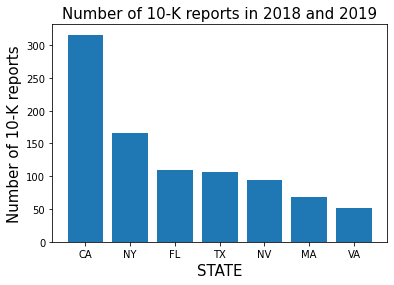

In [30]:

# Question 16

# Creating state_count dictionary
# based on code from https://pandas.pydata.org/docs/reference/api/pandas.Series.to_dict.html
state_count = df_10K_state['STATE'].value_counts()[:7]
state_count = state_count.to_dict()

# Plot bar chart
# based on code from 'inter_ch1_matplotlib_basic_plots', https://matplotlib.org/stable/tutorials/text/text_intro.html,
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and class 5 'inter_ch4_advanced looping'
plt.bar(df_10K_state['STATE'].value_counts().index[:7], state_count.values())
plt.xlabel('STATE', fontsize = 15)
plt.ylabel('Number of 10-K reports', fontsize = 15)
plt.title('Number of 10-K reports in 2018 and 2019', fontsize = 15)
plt.savefig('hw1_ans16_{}.png'.format(student_id))
plt.show()

##### Question 17: Continue to make the `Horizontal bar` graph using the same dataset in Q16. Assign different colors to each bar and arrange the bars in descending order (Large to small from top to bottom).
- Use the `state_count` dictionary you just generated.
- Assign different colors to each bar (You can choose any colors you want).
- Arrange the bars in descending order.
- Set all labels' font size as font size <b>15</b>. 
- Set the ylabel as "`STATE`".
- Set the xlabel as "`Number of 10-K reports`".
- Set the title as "`Number of 10-K reports in 2018 and 2019`".
- Save the graph named "`hw1_ans17_{student_id}.png`".<br/>
  (e.g.) <b>hw1_ans17_37510930.png</b>

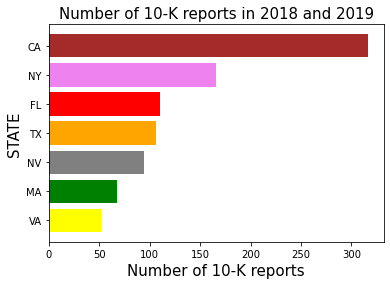

In [31]:

# Question 17

# Plot bar chart
# based on code from 'inter_ch1_matplotlib_basic_plots', https://matplotlib.org/stable/tutorials/text/text_intro.html, 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html, class 5 'inter_ch4_advanced looping', 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html, 
# https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down 
# and https://www.python-graph-gallery.com/3-control-color-of-barplots
plt.barh(df_10K_state['STATE'].value_counts().index[:7], state_count.values(), color=['brown','violet','red','orange','grey','green','yellow'])
plt.xlabel('Number of 10-K reports', fontsize = 15)
plt.ylabel('STATE', fontsize = 15)
plt.title('Number of 10-K reports in 2018 and 2019', fontsize = 15)
plt.gca().invert_yaxis()
plt.savefig('hw1_ans17_{}.png'.format(student_id))
plt.show()

##### Question 18: Make a `Line Plot` to show the number of 10-K reports in state `NY` and `MA` by month in 2018.
- Use the `df_10K_state` dataframe for analysis. 
- Filter out all the 10-K reports in `NY` and `MA` in 2018 and store them as `df_10K_2018`.
- Generate a new column `FILING-MONTH` from column `FILING-DATE`, which records the month of `FILING-DATE`.(eg. `2018-09-01` -> `09`).
- Calculate the number of reports in each month for `NY` and `MA`. Store them separately in two dictionaries: `dict_ny` and `dict_ma`. 
- Sort the dictionary by the key(`month`).
- Make the plot based on the dictionaries.
- Set all labels' font size as font size <b>15</b>. 
- Set the ylabel as "`Number of 10-K reports`" .
- Set the xlabel as "`Months`".
- Set the title as "`The Number of 10-k reports by Months in 2018`".
- Add legend to the plot.
- Save the graph named "`hw1_ans18_{student_id}.png`".<br/>
  (e.g.) <b>hw1_ans18_37510930.png</b>
 
[Hint]
- `apply` : https://www.geeksforgeeks.org/python-pandas-apply/
- `lamda` : https://www.w3schools.com/python/python_lambda.asp
- `sorting dictionary` : https://www.kite.com/python/answers/how-to-sort-a-dictionary-by-key-in-python

<ipython-input-33-bffe18140511>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10K_state['FILING-MONTH'] = datelst2[1]
<ipython-input-33-bffe18140511>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10K_state['FILING-MONTH'] = df_10K_state['FILING-MONTH'].astype('int64')


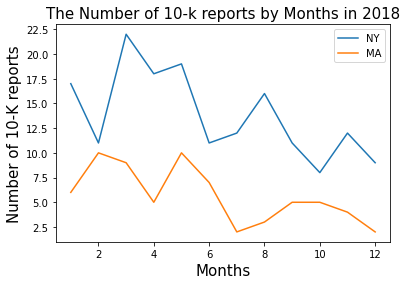

In [33]:

# Question 18

# Creating df_10K_2018 
# based on code from https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
df_10K_2018 = df_10K_state[(df_10K_state['STATE']=='NY')| (df_10K_state['STATE']=='MA')]
df_10K_2018 = df_10K_2018.sort_values('ASSIGNED-SIC', ascending=False, ignore_index= True)

# Creating 'month' column
# based on code from class 05 'inter_ch4_loop group exercises'
lst8 = []
for x in df['FILING-DATE']:
    lst8.append(x.split('-'))

datelst2 = pd.DataFrame(lst8)
df_10K_state['FILING-MONTH'] = datelst2[1]
df_10K_state['FILING-MONTH'] = df_10K_state['FILING-MONTH'].astype('int64')

# Creating dict_ny and dict_ma dictionary
# based on code from https://pandas.pydata.org/docs/reference/api/pandas.Series.to_dict.html
# and https://www.w3resource.com/pandas/series/series-sort_index.php
dict_ny = df_10K_state[df_10K_state['STATE']=='NY']['FILING-MONTH'].value_counts()
dict_ny = dict_ny.sort_index()
dict_ny = dict_ny.to_dict()

dict_ma = df_10K_state[df_10K_state['STATE']=='MA']['FILING-MONTH'].value_counts()
dict_ma = dict_ma.sort_index()
dict_ma = dict_ma.to_dict()

# Plot Line Plot
# based on code from 'inter_ch1_matplotlib_basic_plots', https://matplotlib.org/stable/tutorials/text/text_intro.html,
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html, class 5 'inter_ch4_advanced looping'
# and https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.plot(dict_ny.keys(), dict_ny.values(), label = 'NY')
plt.plot(dict_ma.keys(), dict_ma.values(), label = 'MA')
plt.legend()
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Number of 10-K reports', fontsize = 15)
plt.title('The Number of 10-k reports by Months in 2018', fontsize = 15)
plt.savefig('hw1_ans18_{}.png'.format(student_id))
plt.show()

##### Question 19: How many 10-K reports are generated in each city between 2018 and 2019? Please draw a `histogram` showing the distribution of 10-K report numbers for all cities. Set the bin numbers to `20` 
- Use the `df_10K_state` dataframe for analysis.
- Utilize the `CITY` column to calculate the number of 10-K reports for each city. You may use for-loop, Counter, or groupby.
- Make the histogram and set the number of bins to `20`.
- Set all labels' font size as font size <b>15</b>. 
- Set the xlabel as "`The Number of 10-k reports`".
- Set the title as "`Distribution of the number of 10-k reports for each city`".
- Save the graph named "`hw1_ans19_{student_id}.png`".<br/>
  (e.g.) <b>hw1_ans19_37510930.png</b>

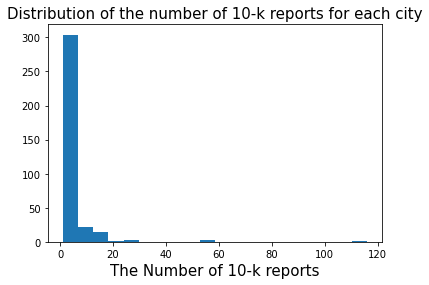

In [34]:

# Question 19

# Getting the number of 10-K per city and Plot histogram
# based on code from class 06 'pandas part1 exploratory data analysis', 'inter_ch1_matplotlib_basic_plots',
# https://matplotlib.org/stable/tutorials/text/text_intro.html,
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and class 5 'inter_ch4_advanced looping'
plt.hist(df_10K_state.groupby('CITY')['id'].count(), bins = 20)
plt.xlabel('The Number of 10-k reports', fontsize = 15)
plt.title('Distribution of the number of 10-k reports for each city', fontsize = 15)
plt.savefig('hw1_ans19_{}.png'.format(student_id))
plt.show()

##### Question 20: Make outfile name format as `hw1_answers_{student_id}.txt` and save it to `txt` file                
- when you write the answer, please keep format(please refer to word doc example).
- The total line number should be 17.
- The first line should be your last name, first name, email.
- From the second to before the last line, these lines should be starting with `answer{number}=your_own_answer`. <br>
 (ex) `answer7=hello` (there will be no whitespace)
- The last line should be `HW 1 is done!!!`
- file name should be like this : <b>hw1_answers_37510930.txt</b>

In [35]:

# Question 20

# Writing a text file
# based on code from class 07 'import1_ch1_import flatfile' and class 5 'inter_ch4_advanced looping'
outfile = open('hw1_answers_{}.txt'.format(student_id), 'w')
outfile.write('{}, {}, {}\n'.format(last_name, first_name, email))

outfile.write('answer1={}\n'.format(ans1))
outfile.write('answer2={}\n'.format(ans2))
outfile.write('answer3={}\n'.format(ans3))
outfile.write('answer4={}\n'.format(ans4))
outfile.write('answer5={}\n'.format(ans5))
outfile.write('answer6={}\n'.format(ans6))
outfile.write('answer7={}\n'.format(ans7))
outfile.write('answer8={}\n'.format(ans8))
outfile.write('answer9={}\n'.format(ans9))
outfile.write('answer10={}\n'.format(ans10))
outfile.write('answer11={}\n'.format(ans11))
outfile.write('answer12={}\n'.format(ans12))
outfile.write('answer13={}\n'.format(ans13))
outfile.write('answer14={}\n'.format(ans14))
outfile.write('answer15={}\n'.format(ans15))


outfile.write('HW 1 is done!!!')
outfile.close()

#### After finishing `hw1`, please submit this python code file !!!!! 
#### Again, the code file name should be as follows: `hw1_{student_id}.py` 
(e.g.) hw1_37510930.py